In [2]:
import numpy as np
import pandas as pd

### Task 1:
### This assignment is for visualization using matplotlib:
### data to use:
### url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
### titanic = pd.read_csv(url)
### Charts to plot:
### 1. Create a pie chart presenting the male/female proportion.

In [3]:
import matplotlib.pyplot as pt
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [3]:
male = titanic.loc[titanic.sex == 'male']
female = titanic.loc[titanic.sex == 'female']

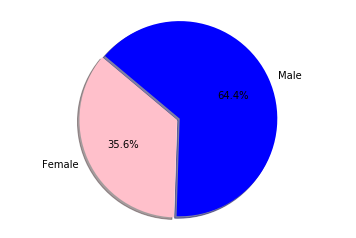

In [4]:
labels = 'Female', 'Male'
sizes = [466, 843]
colors = ['pink','blue']
explode = (0.03, 0)  # explode 1st slice
pt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
pt.axis('equal')
pt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender.

In [5]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


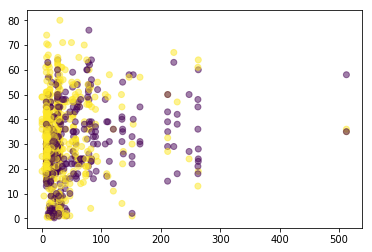

In [31]:
pt.scatter(titanic['fare'], titanic['age'], alpha=0.5, c=pd.factorize(titanic['sex'])[0])
pt.show()

## Task 2.

In [473]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

### 2.1 Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [326]:
df.iloc[1:2,1:2] = 10055
df.iloc[3:4,1:2] = 10075
df['FlightNumber']  = df.FlightNumber.astype(int, inplace=True)
print(df)
df.info()

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    5 non-null int32
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: int32(1), object(3)
memory usage: 220.0+ bytes


### 2.2 The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [330]:
column_exone = lambda x:x[0]
df['col_one'] = df.From_To.str.split("_").map(column_exone)
column_extwo = lambda x:x[1]
df['col_two'] = df.From_To.str.split("_").map(column_extwo)
df

,From_To,FlightNumber,RecentDelays,Airline,col_one,col_two
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


### 2.3 Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [340]:
df['From_To'] = df.From_To.str.capitalize()

In [341]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,London_paris,10045.0,"[23, 47]",KLM(!)
1,Madrid_milan,NaN,[],<Air France> (12)
2,London_stockholm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_paris,NaN,[13],12. Air France
4,Brussels_london,10085.0,"[67, 32]","""Swiss Air"""


### 2.4 Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [339]:
df.iloc[0:5,1:4]

,FlightNumber,RecentDelays,Airline
0,10045.0,"[23, 47]",KLM(!)
1,NaN,[],<Air France> (12)
2,10065.0,"[24, 43, 87]",(British Airways. )
3,NaN,[13],12. Air France
4,10085.0,"[67, 32]","""Swiss Air"""


### 2.5 In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [350]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,London_paris,10045.0,"[23, 47]",KLM(!)
1,Madrid_milan,NaN,[],<Air France> (12)
2,London_stockholm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_paris,NaN,[13],12. Air France
4,Brussels_london,10085.0,"[67, 32]","""Swiss Air"""


In [475]:
def get_col(nl, cnt):
    if not nl:
        return 'NaN'
    else:
        try:
            np = nl[cnt]
        except IndexError:
            return 'NaN'
        else:
            return nl[cnt]
for pt in range(0, 3):
    dt = pt
    dt+=1
    df['delay_'+str(dt)] = df.RecentDelays.map(lambda x:get_col(x, pt))
df.rename(columns={'RecentDelays':'Delays'})

,From_To,FlightNumber,Delays,Airline,delay_1,delay_2,delay_3
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!),23,47,NaN
1,MAdrid_miLAN,NaN,[],<Air France> (12),NaN,NaN,NaN
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. ),24,43,87
3,Budapest_PaRis,NaN,[13],12. Air France,13,NaN,NaN
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air""",67,32,NaN
